In [4]:
%matplotlib inline
import os
import numpy as np

In [41]:
NUM_ACTIONS = 3


regret_sum = np.zeros(NUM_ACTIONS, np.double)
strategy = np.zeros(NUM_ACTIONS, np.double)
strategy_sum = np.zeros(NUM_ACTIONS, np.double)
opp_strategy = np.array([0.4, 0.3, 0.3])


In [42]:
def get_strategy():
    global regret_sum, strategy_sum
    norm_sum = 0
    strategy = np.maximum(regret_sum, 0)
    norm_sum = np.sum(strategy)
    if norm_sum > 0:
        strategy /= norm_sum
    else:
        strategy = np.ones(NUM_ACTIONS) / NUM_ACTIONS
    strategy_sum += strategy
    return strategy
    


In [43]:
get_strategy()

array([0.33333333, 0.33333333, 0.33333333])

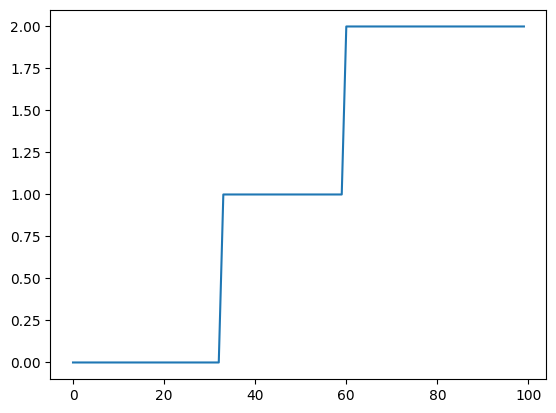

In [60]:
def get_action(strategy):
    strategy / np.sum(strategy)
    r = np.random.uniform()
    #sorted_sum = np.sort(np.cumsum(strategy))
    #return [x for x in sorted_sum if x > r]
    return np.searchsorted(np.cumsum(strategy) , r)

a = [get_action(get_strategy()) for i in range(100)]
plot(sorted(a))

In [61]:

def train(epochs):
    uu = 0
    action_utility = np.zeros(NUM_ACTIONS)
    for i in range(epochs):
        strategy = get_strategy()
        my_action = get_action(np.array([0,1,0]))
        other_action = get_action(opp_strategy)
        uu += utility(my_action, other_action)
    return uu

def get_average_strategy():
    global strategy_sum
    avg_strat = np.array(NUM_ACTIONS, np.double)
    normsum = np.sum(strategy_sum)
    if normsum > 0:
        avg_strat /= normsum
    else:
        avg_strat = 1.0 * np.ones(NUM_ACTIONS) / NUM_ACTIONS
    return avg_strat

[16, 20, 12, 10, 6, 11, 7, 6, 16, 13, 14, 26, 4, 18, 25, 15, 20, 0, 11, 9, 10, 1, 25, 15, 12, 8, 5, 8, 4, 9, 34, 3, 14, 25, 12, 22, -10, 11, 11, 16, 24, 9, 14, 10, 5, 7, 22, 18, 16, 0, 16, 15, 14, 16, 8, 27, 7, -3, 14, 10, 3, 14, 13, -5, 10, 7, 16, -3, 18, 4, 7, 9, 9, 12, 20, 6, 26, 6, 12, 5, 17, 12, 21, 16, 3, 11, 9, 10, 17, 17, 4, 11, 3, 12, 3, 24, 1, 7, 2, 7, 8, 3, 13, 5, 3, 22, 17, 29, -5, 7, -1, 24, 30, 21, 9, -1, 10, 13, 9, 12, 19, 15, 4, 2, 2, 20, 17, 7, 14, 10, 10, -1, 11, 6, 21, 10, 10, 22, 1, 19, 2, 10, 10, 8, 10, 19, 9, -1, 17, 5, 21, -2, 10, 2, -4, 23, 10, 16, 15, 26, 8, 9, 9, 12, 9, 11, 10, 24, -3, 20, 9, 8, -5, 16, 8, 11, 21, 14, 12, 18, 10, 13, 11, 25, 20, 16, 14, 6, -2, 1, 4, 5, -2, 6, 33, 16, 18, 12, 5, 16]


([<matplotlib.lines.Line2D at 0x7fce0d4bf400>], 11.2)

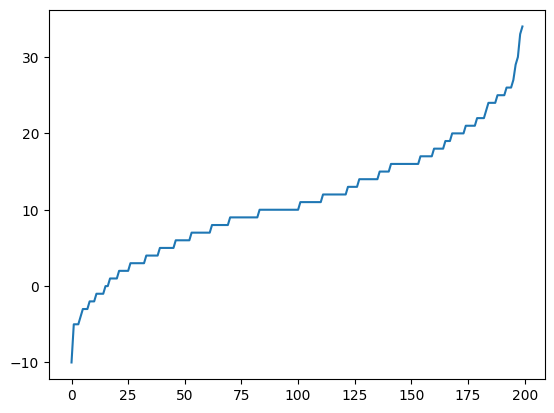

In [65]:
def utility(p1, p2):
    if p1 == p2:
        return 0
    elif p1 == 2 and p2 == 1:
        return 1
    elif p1 == 0 and p2 == 2:
        return 1
    elif p1 == 1 and p2 == 0:
        return 1
    else: 
        return -1
    
uuu = []
for j in range(200):
    us = train(100)
    uuu.append(us)
print(uuu)
plot(sorted(uuu)), np.mean(uuu)


